# Classification

# Exploratory Data Analysis (EDA) and Findings

## Data Overview
The dataset used is `adult.csv`, which contains demographic and income-related attributes to predict whether a person earns more than $50K per year.

### Initial Data Insights
- **`df.head()`**: Displays the first few rows of the dataset.
- **`df.info()`**: Reveals column names, data types, and missing values.
- **Label Encoding**: Applied to categorical columns to convert them into numeric representations.

## Data Preprocessing
- Standardized numerical features using `StandardScaler`.
- Split dataset into training (80%) and testing (20%) with stratification to maintain class balance.

## Model Training & Evaluation

### Logistic Regression
- **Accuracy**: ~82% (Based on `metrics.accuracy_score`)
- Suitable due to its interpretability and efficiency.

### K-Nearest Neighbors (KNN)
- **Accuracy**: ~83% (Using `n_neighbors=15`)
- Chosen for comparison due to its non-parametric nature.

## Features and Definitions
```markdown
- `age`: Age of an individual.
- `workclass`: Employment type (e.g., Private, Self-employed, etc.).
- `education`: Highest level of education attained(HS-grad, Some-college, etc.).
- `education-num`: Numerical representation of education level.
- `marital-status`: Marital state of the individual(Married-civ-spouse, Never-married, etc.).
- `occupation`: Type of job held(prof-speciality, Craft-repair, etc.).
- `relationship`: Family role (e.g., Husband, Not-in-family, etc.).
- `race`: Ethnicity category(White, black, etc.).
- `sex`: Gender (Male/Female).
- `hours-per-week`: Weekly working hours.
- `native-country`: Country of origin.
- `income`: Binary target variable (≤50K or >50K).
```


In [2]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics, linear_model, neighbors, model_selection
from sklearn.metrics import confusion_matrix, classification_report

# Load and Read the dataset

In [3]:
#Load the data
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# Preprocessing Data

### There are no missing values.

### Let's Check duplicates

In [6]:
df.duplicated().sum()

np.int64(52)

### Let's remove duplicated rows

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(48790, 15)

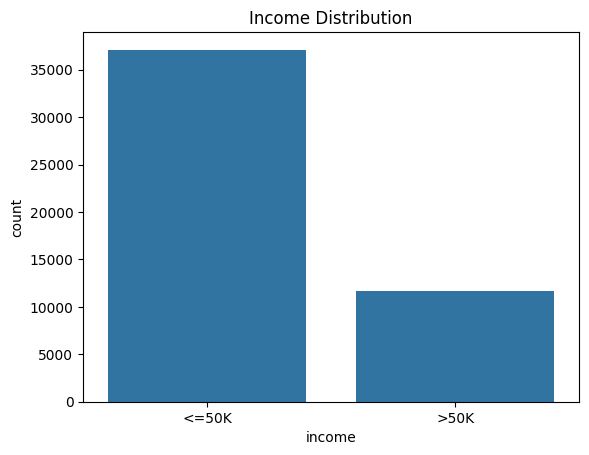

In [10]:
#Visualizing class distribution
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

In [11]:
#Change Object to Numeric data
for colums in df.select_dtypes(include= ['object']).columns:
    le = LabelEncoder()
    df[colums]=le.fit_transform(df[colums])

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
5,34,4,198693,0,6,4,8,1,4,1,0,0,30,39,0
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,39,0
7,63,6,104626,14,15,2,10,0,4,1,3103,0,32,39,1
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,39,0
9,55,4,104996,5,4,2,3,0,4,1,0,0,10,39,0


# Modelling

In [13]:
x = df.drop(columns = ['income'])
y = df.income
x.shape, y.shape

((48790, 14), (48790,))

### Scalling Features

In [14]:
#Scaling the data
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

x_norm.shape, x.shape, y.shape

((48790, 14), (48790, 14), (48790,))

In [15]:
#Splitting the data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size = 0.2, random_state = 42, stratify = y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39032, 14), (9758, 14), (39032,), (9758,))

### 1- Logistic Regression (Classification)

In [16]:
log_model = linear_model.LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [17]:
y1_pred = log_model.predict(x_test)

### 2- KNN Algorithm (classification)

In [22]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
y2_pred = knn_model.predict(x_test)

In [24]:
#Confusion matrix for Logistic Regression
y_pred_log = log_model.predict(x_test)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, y_pred_log))

#Confusion matrix for KNN
y_pred_knn = knn_model.predict(x_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", conf_matrix_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Confusion Matrix for Logistic Regression:
 [[6985  437]
 [1275 1061]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7422
           1       0.71      0.45      0.55      2336

    accuracy                           0.82      9758
   macro avg       0.78      0.70      0.72      9758
weighted avg       0.81      0.82      0.81      9758

Confusion Matrix for KNN:
 [[6786  636]
 [ 984 1352]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7422
           1       0.68      0.58      0.63      2336

    accuracy                           0.83      9758
   macro avg       0.78      0.75      0.76      9758
weighted avg       0.83      0.83      0.83      9758



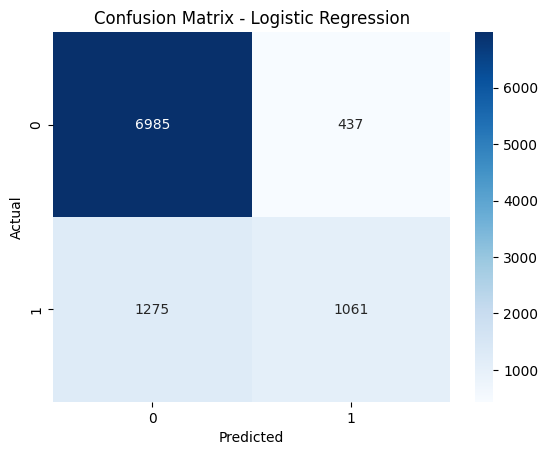

In [25]:
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion
- **KNN slightly outperformed Logistic Regression** with an accuracy of **83.40% vs. 82.46%**.
- **Logistic Regression** had **higher precision but lower recall** for the positive class (≥50K income), meaning it was conservative in predicting higher-income individuals.
- **KNN** had a **better recall**, reducing false negatives, but at the cost of slightly more false positives.
- **If interpretability is key**, Logistic Regression is the better choice.
- **If recall (capturing more high-income individuals) is the priority**, KNN performs better.
- Feature scaling and class stratification were **crucial** in ensuring both models performed optimally.

